# MALARIA DETECTION
### Malaria diagnosis involves a close examination of the blood smear at 100x magnification. This is followed by a manual counting process wherein experts count the number of Red blood cells impacted by parasites. Automatic detection of Malaria from blood smear image is a scalable solution and can save a lot of hours for healthcare industry going a long way in our battle against this deadly disease.

## In this project, we try to identify from blood smears using deep learning to predict whether the sample is taken from an infected person.

## Loading the libraries and image

In [8]:
from skimage.io import imshow,imread,imsave
import pandas as pd
import numpy as np

In [9]:
train_df=pd.read_csv(r"C:\Users\samya\Downloads\Project-Malaria Detection Dataset\Malaria_Detection_Project\train.csv")
train_df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria


## Encoding the dataset

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df["label"]=le.fit_transform(train_df["label"])
train_df=pd.DataFrame(train_df,columns=train_df.columns)
train_df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,1
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,0
2,C59P20thinF_IMG_20150803_111333_cell_144.png,1
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,1
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,1


## Creating train and test datasets

In [11]:
from sklearn.model_selection import train_test_split as tts

train_file,test_file,train_label,test_label=tts(train_df["filename"],train_df["label"],test_size=0.25,random_state=20)

train_file.shape,test_file.shape,train_label.shape,test_label.shape

((14467,), (4823,), (14467,), (4823,))

## Reading and showing a random image

In [12]:
import os
base_dir=os.path.join(r"C:\Users\samya\Downloads\Project-Malaria Detection Dataset\Malaria_Detection_Project\cell_images")

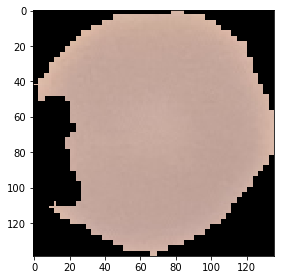

In [13]:
random=np.random.randint(0,2000)
image1=imread(os.path.join(base_dir,train_file.iloc[random]))
imshow(image1)

## Creating HOG Features

In [14]:
from skimage.feature import hog
from skimage.transform import resize

img_dim=(128,64)

In [15]:
test_features=[]
for i in test_file:
    image=imread(os.path.join(base_dir,i))
    image=resize(image,img_dim)
    features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
    hog_features=np.reshape(features,features.shape[0])
    test_features.append(hog_features)

In [24]:
train_features=[]
for i in train_file:
    image=imread(os.path.join(base_dir,i))
    image=resize(image,img_dim)
    features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
    hog_features=np.reshape(features,features.shape[0])
    train_features.append(hog_features)

In [25]:
train_features=np.array(train_features)
test_features=np.array(test_features)

## Model Building
### Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_features,train_label)

C:\Users\samya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lr_test=lr.predict(test_features)
accuracy_score(test_label,lr_test)

0.8127721335268505

### Linear SVM

In [34]:
from sklearn.svm import LinearSVC
sv=LinearSVC()
sv.fit(train_features,train_label)

C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [35]:
sv_test=sv.predict(test_features)
accuracy_score(test_label,sv_test)

0.7972216462782501